In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [163]:
nydata=pd.read_csv("NY property data.csv")
nydata[["ZIP"]]=nydata[["ZIP"]].astype('category')
nydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   RECORD    1070994 non-null  int64   
 1   BBLE      1070994 non-null  object  
 2   B         1070994 non-null  int64   
 3   BLOCK     1070994 non-null  int64   
 4   LOT       1070994 non-null  int64   
 5   EASEMENT  4636 non-null     object  
 6   OWNER     1039249 non-null  object  
 7   BLDGCL    1070994 non-null  object  
 8   TAXCLASS  1070994 non-null  object  
 9   LTFRONT   1070994 non-null  int64   
 10  LTDEPTH   1070994 non-null  int64   
 11  EXT       354305 non-null   object  
 12  STORIES   1014730 non-null  float64 
 13  FULLVAL   1070994 non-null  float64 
 14  AVLAND    1070994 non-null  float64 
 15  AVTOT     1070994 non-null  float64 
 16  EXLAND    1070994 non-null  float64 
 17  EXTOT     1070994 non-null  float64 
 18  EXCD1     638488 non-null   float64 
 19  

In [387]:
nydata.EXCD1.describe()

count    638488.000000
mean       1602.014232
std        1384.226741
min        1010.000000
25%        1017.000000
50%        1017.000000
75%        1017.000000
max        7170.000000
Name: EXCD1, dtype: float64

In [385]:
# col_num=nydata.columns[nydata.dtypes.isin(["int64","float64"])]
col_num=["LTFRONT","LTDEPTH","STORIES","FULLVAL","AVLAND","AVTOT","EXLAND","EXTOT","BLDFRONT","BLDDEPTH","AVLAND2","AVTOT2","EXLAND2","EXTOT2"]
l=[]
for c in col_num:
    l.append([c,np.sum(nydata[c]==0),np.nanmin(nydata[c]),np.nanmedian(nydata[c]),np.nanmean(nydata[c]),np.max(nydata[c]),np.nanstd(nydata[c])])
pd.DataFrame(l)

,0,1,2,3,4,5,6
0,LTFRONT,169108,0.0,25.0,36.635301,9.999000e+03,7.403280e+01
1,LTDEPTH,170128,0.0,100.0,88.861594,9.999000e+03,7.639625e+01
2,STORIES,0,1.0,2.0,5.006918,1.190000e+02,8.365703e+00
3,FULLVAL,13007,0.0,447000.0,874264.505434,6.150000e+09,1.158243e+07
4,AVLAND,13009,0.0,13678.0,85067.918672,2.668500e+09,4.057258e+06
5,AVTOT,13007,0.0,25340.0,227238.168711,4.668309e+09,6.877526e+06
6,EXLAND,491699,0.0,1620.0,36423.890692,2.668500e+09,3.981574e+06
7,EXTOT,432572,0.0,1620.0,91186.981682,4.668309e+09,6.508400e+06
8,BLDFRONT,228815,0.0,20.0,23.042770,7.575000e+03,3.557968e+01
9,BLDDEPTH,228853,0.0,39.0,39.922836,9.393000e+03,4.270713e+01


In [382]:
nydata.EXTOT2.describe()

count    1.308280e+05
mean     6.567683e+05
std      1.607251e+07
min      7.000000e+00
25%      2.870000e+03
50%      3.706200e+04
75%      1.068408e+05
max      4.501180e+09
Name: EXTOT2, dtype: float64

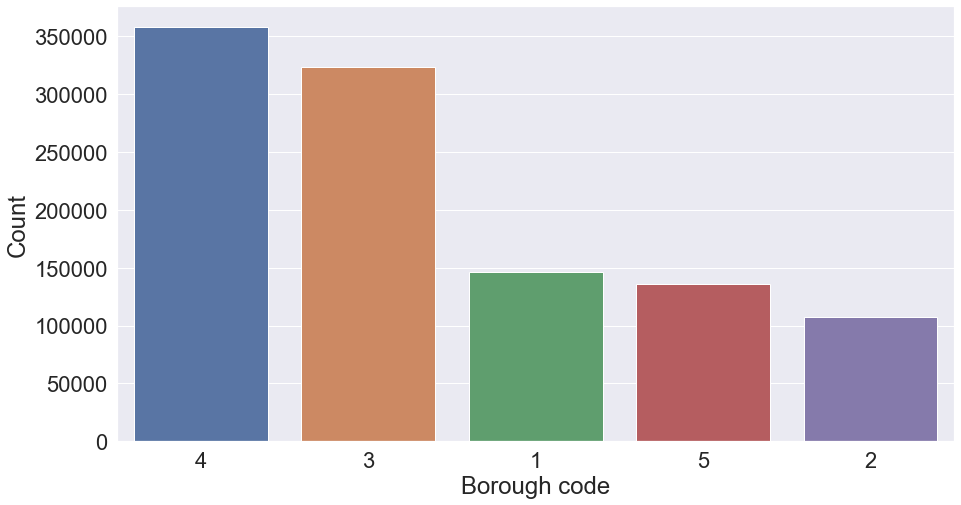

In [3]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot=sns.countplot(x="B",data=nydata,order=nydata.B.value_counts().index)
plot.set(xlabel="Borough code",ylabel="Count")
plt.show()
plot.figure.savefig('02B_summary.png')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Blocks in Manhattan ')]

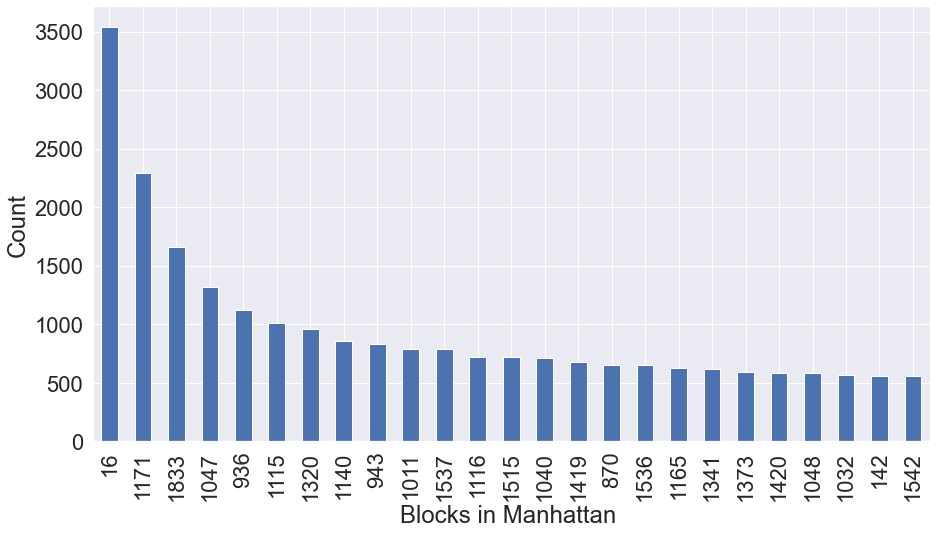

In [22]:
plot=nydata[nydata.B==1].BLOCK.value_counts().head(25).plot(kind="bar",ax=axes[0])
plot.set(xlabel="Blocks in Manhattan ",ylabel="Count")
# plt.rcParams["figure.figsize"] = [15,8]
# sns.set(font_scale=2)
# plot=sns.countplot(x="BLOCK",data=block1,order=block1.BLOCK.value_counts().index)
# plot.set(xlabel="BLOCK",ylabel="Count")
# plt.show()
# # plot.figure.savefig('02B_summary.png')

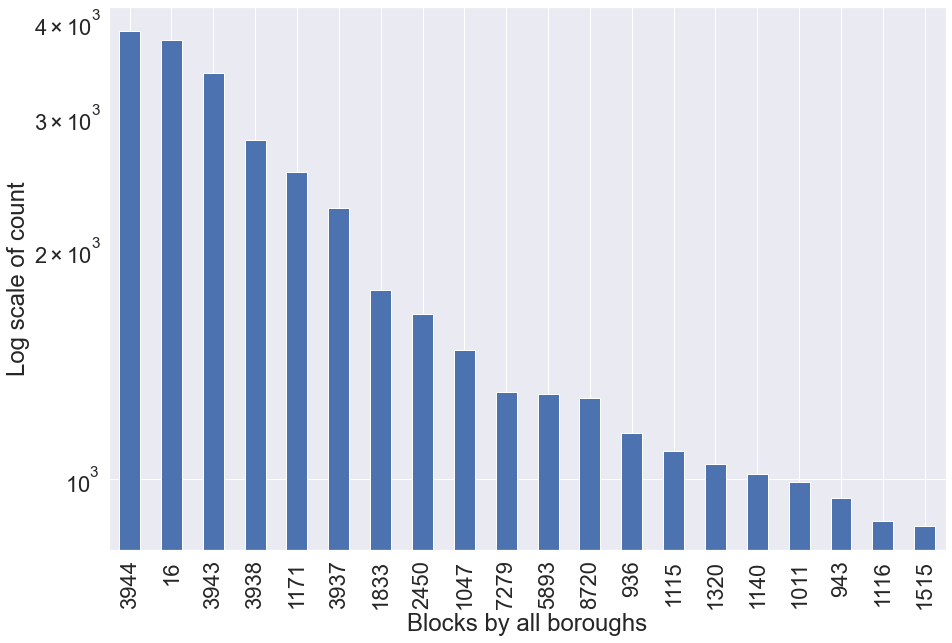

In [54]:
plt.rcParams["figure.figsize"] = [15,10]
plot1=nydata.BLOCK.value_counts().head(20).plot(kind="bar")
plot1.set(xlabel="Blocks by all boroughs",ylabel="Log scale of count")
plot1.set_yscale('log')
plt.show()
plot1.figure.savefig('03Block_summary.png')

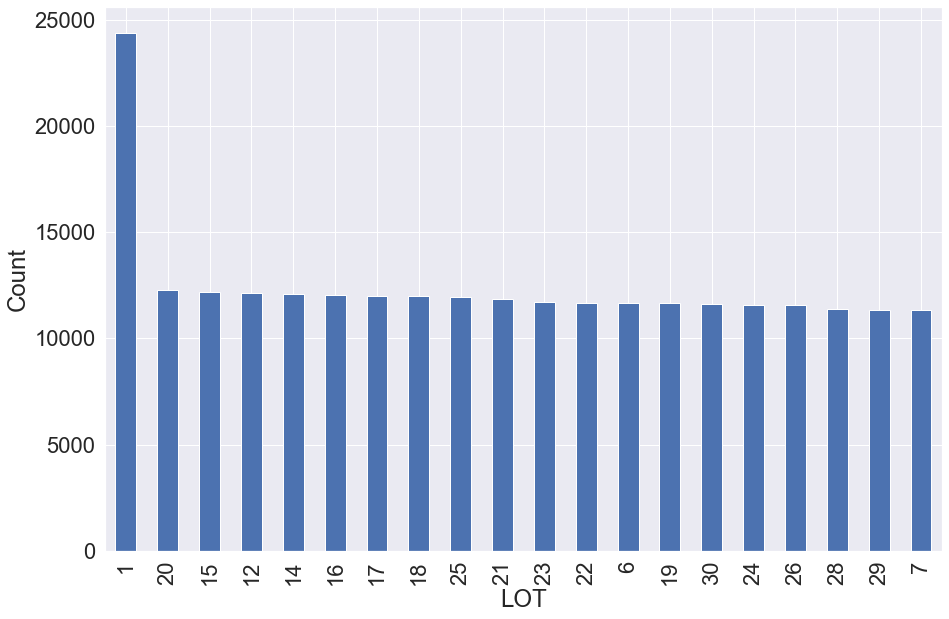

In [51]:
plt.rcParams["figure.figsize"] = [15,10]
plot2=nydata.LOT.value_counts().head(20).plot(kind="bar")
plot2.set(xlabel="LOT",ylabel="Count")
# plot2.set_yscale('log')
plt.show()
plot2.figure.savefig('04LOT_summary.png')

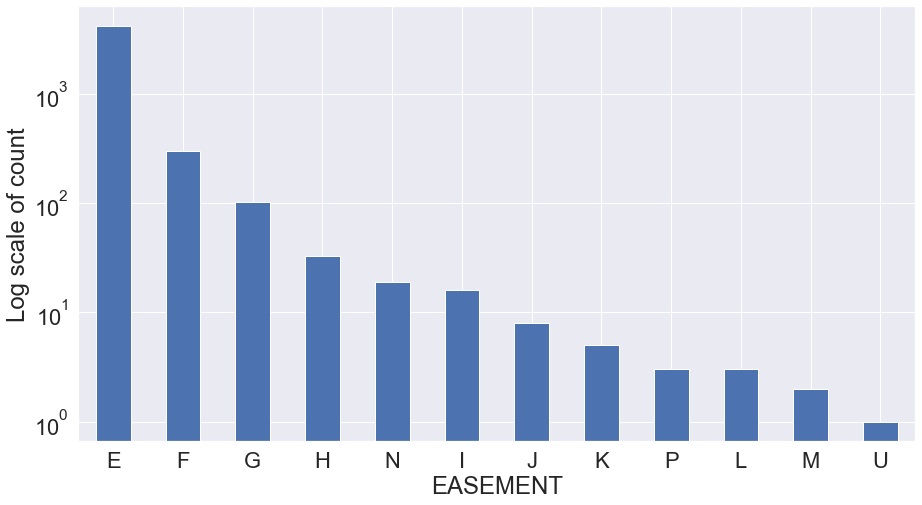

In [388]:
plot3=nydata.EASEMENT.value_counts().plot(kind='bar')
plot3.set(xlabel="EASEMENT",ylabel="Log scale of count")
plt.xticks(rotation=0)
plot3.set_yscale('log')
plt.show()
plot3.figure.savefig('05EASEMENT_summary.png')

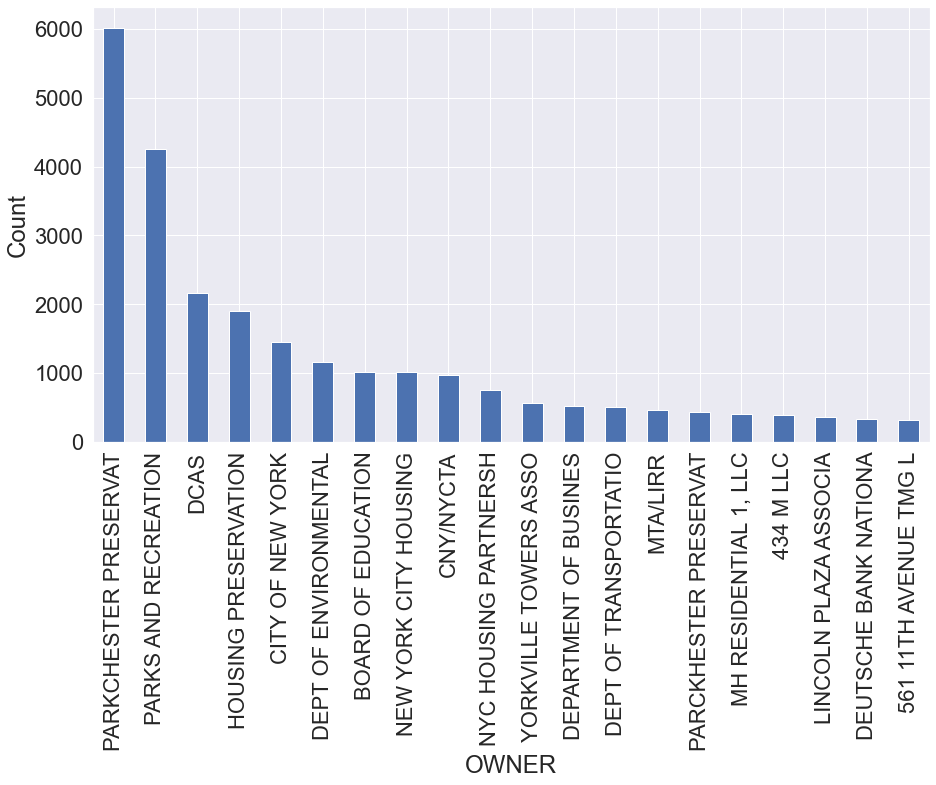

In [15]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot4=nydata.OWNER.value_counts().head(20).plot(kind='bar')
plot4.set(xlabel="OWNER",ylabel="Count")
# plt.xticks(rotation=0)
# plot4.set_yscale('log')
plt.show()
plot4.figure.savefig('06Owner_summary.png',dpi=300)

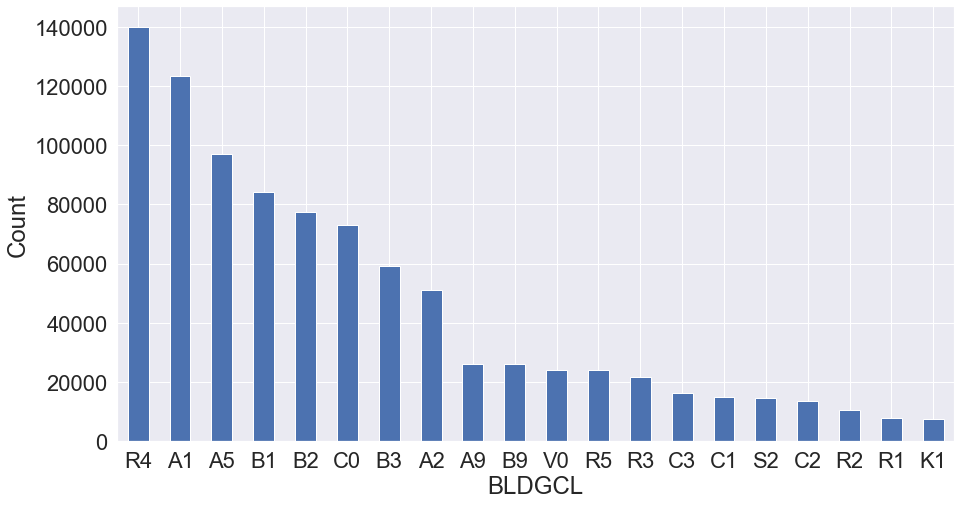

In [22]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot5=nydata.BLDGCL.value_counts().head(20).plot(kind='bar')
plot5.set(xlabel="BLDGCL",ylabel="Count")
plt.xticks(rotation=0)
# plot4.set_yscale('log')
plt.show()
plot5.figure.savefig('07BLDGCL_summary.png',dpi=300)

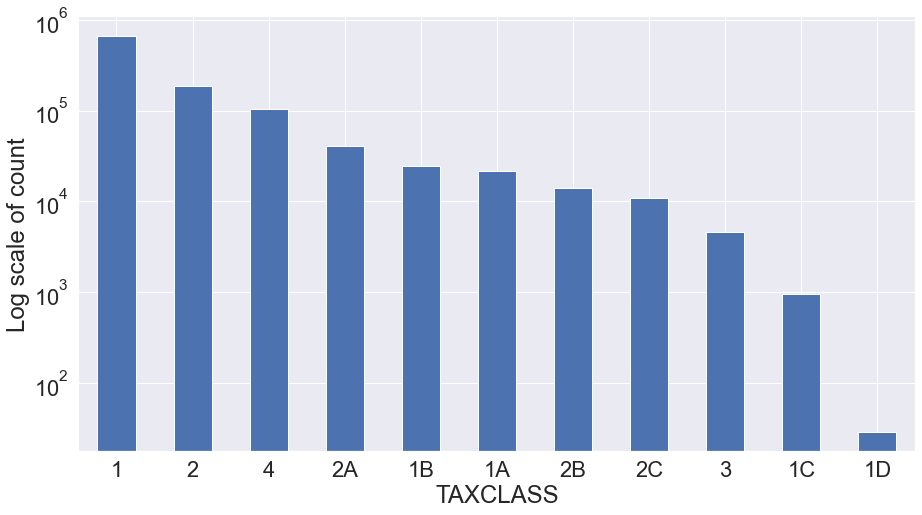

In [21]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot6=nydata.TAXCLASS.value_counts().head(20).plot(kind='bar')
plot6.set(xlabel="TAXCLASS",ylabel="Log scale of count")
plt.xticks(rotation=0)
plot6.set_yscale('log')
plt.show()
plot6.figure.savefig('08TAXCLASS_summary.png',dpi=300)

0.009367932966944726


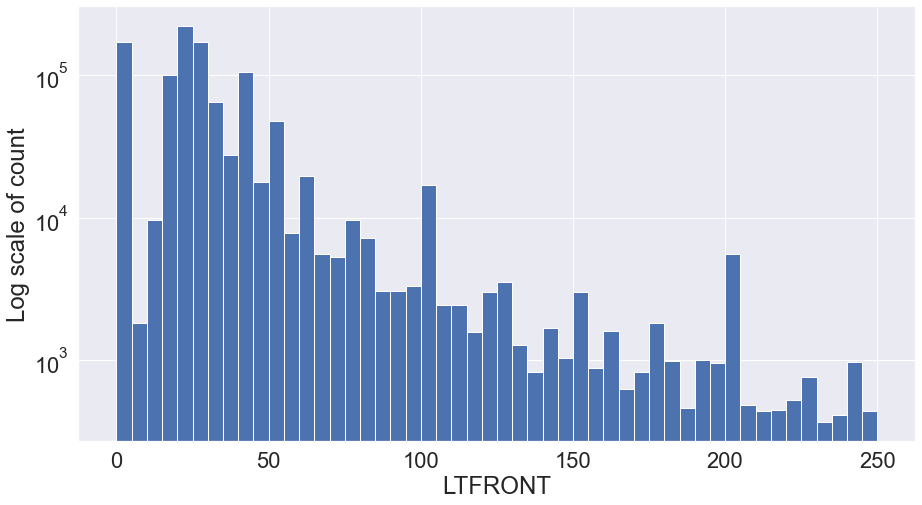

In [76]:
print((nydata.LTFRONT>250).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot7=nydata[nydata.LTFRONT<=250].LTFRONT.plot(kind='hist',bins=50)
plot7.set(xlabel="LTFRONT",ylabel="Log scale of count")
plt.xticks(rotation=0)
plot7.set_yscale('log')
plt.show()
plot7.figure.savefig('09LTFRONT_summary.png',dpi=300)

In [82]:
nydata.LTDEPTH.value_counts(bins=200,normalize=True)[:10]

(99.99, 149.985]     0.565257
(49.995, 99.99]      0.209637
(-10.0, 49.995]      0.180118
(149.985, 199.98]    0.021201
(199.98, 249.975]    0.012417
(249.975, 299.97]    0.002892
(299.97, 349.965]    0.001842
(399.96, 449.955]    0.001509
(349.965, 399.96]    0.001004
(449.955, 499.95]    0.000785
Name: LTDEPTH, dtype: float64

0.9900905140458304


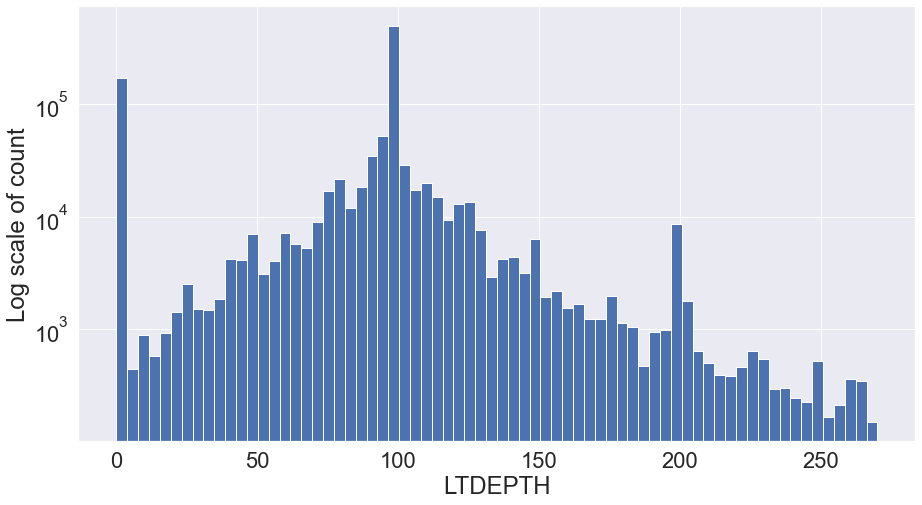

In [102]:
print(1-(nydata.LTDEPTH>270).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot8=nydata[nydata.LTDEPTH<=270].LTDEPTH.plot(kind='hist',bins=70)
plot8.set(xlabel="LTDEPTH",ylabel="Log scale of count")
plt.xticks(rotation=0)
plot8.set_yscale('log')
plt.show()
plot8.figure.savefig('10LTDEPTH_summary.png',dpi=300)

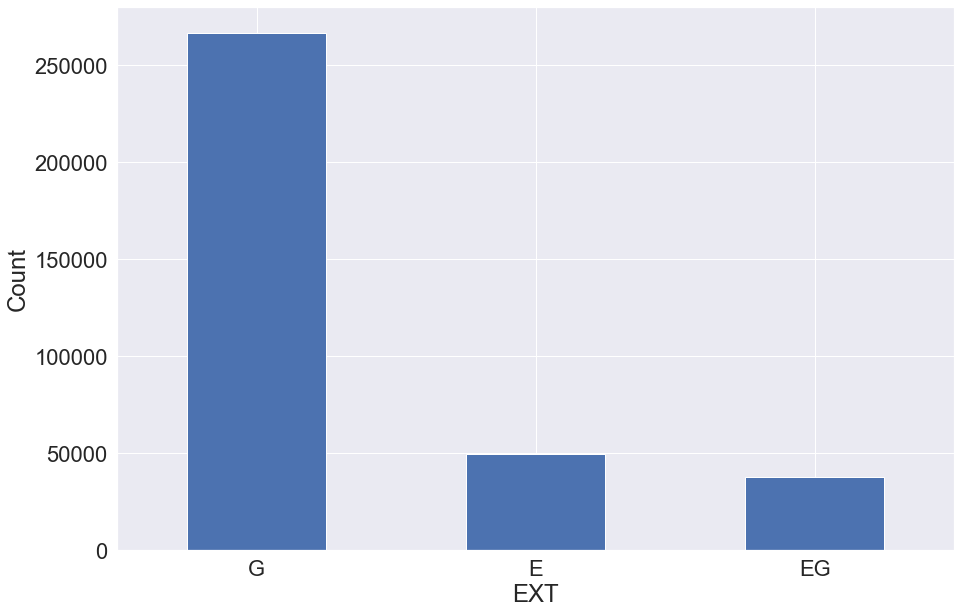

In [107]:
plt.rcParams["figure.figsize"] = [15,10]
plot9=nydata.EXT.value_counts().head(20).plot(kind="bar")
plot9.set(xlabel="EXT",ylabel="Count")
plt.xticks(rotation=0)
# plot1.set_yscale('log')
plt.show()
plot9.figure.savefig('11EXT_summary.png')

In [116]:
nydata.STORIES.value_counts(bins=300,normalize=True)[31:30]

(1.787, 2.18]       0.387606
(2.967, 3.36]       0.121519
(0.881, 1.393]      0.090332
(2.18, 2.573]       0.076894
(1.393, 1.787]      0.036382
(3.753, 4.147]      0.035800
(5.72, 6.113]       0.028885
(4.933, 5.327]      0.024249
(2.573, 2.967]      0.012910
(11.62, 12.013]     0.011389
(7.687, 8.08]       0.011161
(6.9, 7.293]        0.011110
(8.867, 9.26]       0.006856
(12.8, 13.193]      0.006844
(15.947, 16.34]     0.005068
(20.667, 21.06]     0.004561
(18.7, 19.093]      0.004543
(10.833, 11.227]    0.004163
(14.767, 15.16]     0.003987
(9.653, 10.047]     0.003509
(16.733, 17.127]    0.003228
(13.98, 14.373]     0.003145
(19.88, 20.273]     0.002934
(31.68, 32.073]     0.002920
(29.713, 30.107]    0.002712
(41.907, 42.3]      0.002684
(30.893, 31.287]    0.002412
(26.96, 27.353]     0.002178
(17.913, 18.307]    0.002095
(23.813, 24.207]    0.001958
Name: STORIES, dtype: float64

0.008917883760319852


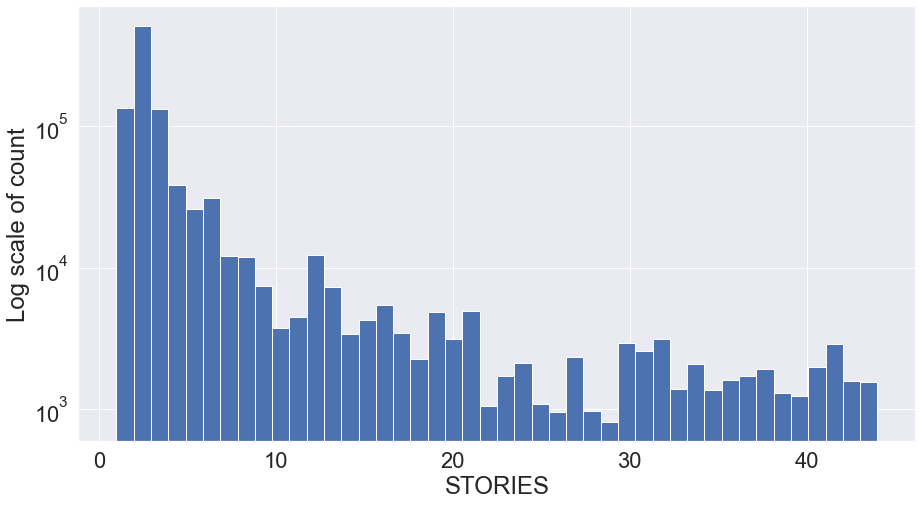

In [127]:
print((nydata.STORIES>44).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot10=nydata[nydata.STORIES<=44].STORIES.plot(kind='hist',bins=44)
plot10.set(xlabel="STORIES",ylabel="Log scale of count")
plt.xticks(rotation=0)
plot10.set_yscale('log')
plt.show()
plot10.figure.savefig('11STORIES_summary.png',dpi=300)

In [132]:
nydata.FULLVAL.value_counts(bins=5000,normalize=True)[:20]

(-6150000.001, 1230000.0]    0.934886
(1230000.0, 2460000.0]       0.034932
(2460000.0, 3690000.0]       0.009503
(3690000.0, 4920000.0]       0.005184
(4920000.0, 6150000.0]       0.003294
(6150000.0, 7380000.0]       0.002194
(7380000.0, 8610000.0]       0.001582
(8610000.0, 9840000.0]       0.001122
(9840000.0, 11070000.0]      0.000844
(11070000.0, 12300000.0]     0.000715
(12300000.0, 13530000.0]     0.000607
(13530000.0, 14760000.0]     0.000420
(14760000.0, 15990000.0]     0.000382
(15990000.0, 17220000.0]     0.000347
(17220000.0, 18450000.0]     0.000271
(18450000.0, 19680000.0]     0.000243
(19680000.0, 20910000.0]     0.000209
(20910000.0, 22140000.0]     0.000199
(22140000.0, 23370000.0]     0.000166
(23370000.0, 24600000.0]     0.000142
Name: FULLVAL, dtype: float64

0.06511427701742493


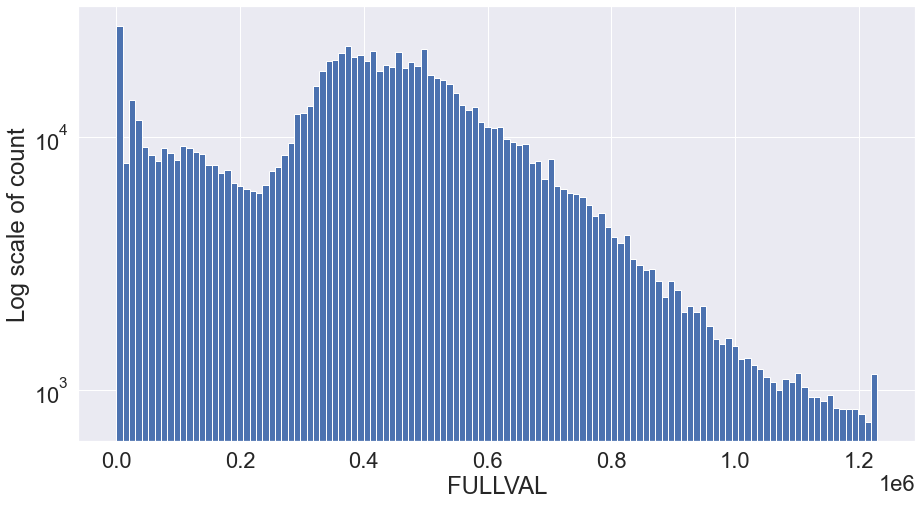

In [153]:
print((nydata.FULLVAL>1230000).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot11=nydata[nydata.FULLVAL<=1230000].FULLVAL.plot(kind='hist',bins=120)
plot11.set(xlabel="FULLVAL",ylabel="Log scale of count")
plt.xticks(rotation=0)
plot11.set_yscale('log')
plt.show()
plot11.figure.savefig('12FULLVAL_summary.png',dpi=300)

In [155]:
nydata.AVLAND.value_counts(bins=5000,normalize=True)[:20]
nydata.AVLAND.describe()

count    1.070994e+06
mean     8.506792e+04
std      4.057260e+06
min      0.000000e+00
25%      9.180000e+03
50%      1.367800e+04
75%      1.974000e+04
max      2.668500e+09
Name: AVLAND, dtype: float64

In [171]:
nydata.AVLAND2.describe()

count    2.827260e+05
mean     2.462357e+05
std      6.178963e+06
min      3.000000e+00
25%      5.705000e+03
50%      2.014500e+04
75%      6.264000e+04
max      2.371005e+09
Name: AVLAND2, dtype: float64

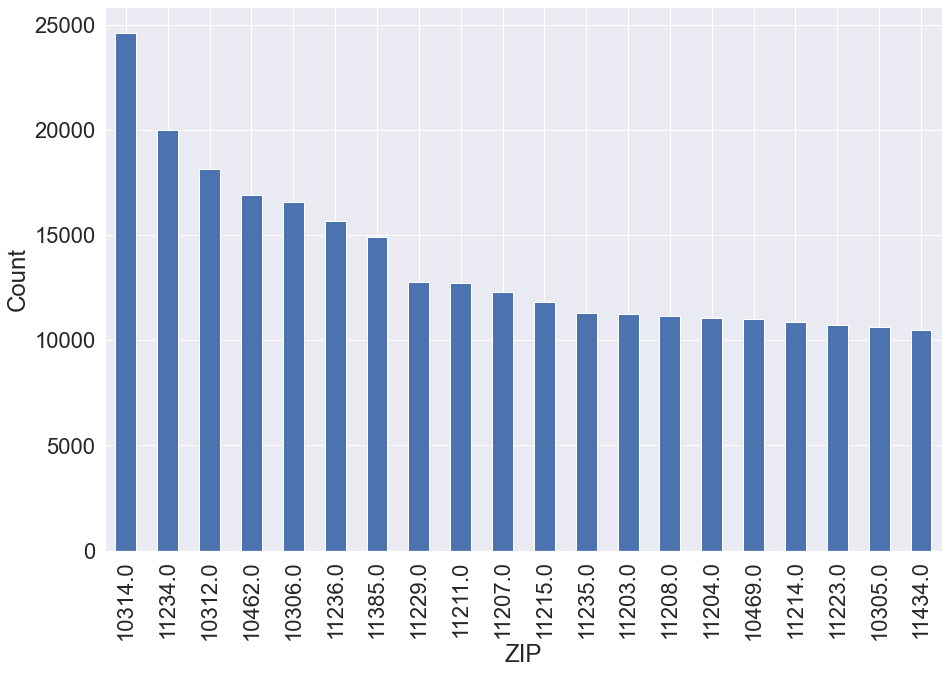

In [242]:
plt.rcParams["figure.figsize"] = [15,10]
plot12=nydata.ZIP.value_counts().head(20).plot(kind="bar")
plot12.set(xlabel="ZIP",ylabel="Count")
# plt.xticks(rotation=0)
# plot12.set_yscale('log')
plt.show()
plot12.figure.savefig('12ZIP_summary.png')

In [187]:
nydata.AVLAND.value_counts(normalize=True,bins=100000)

(-2668500.001, 26685.0]         0.839707
(26685.0, 53370.0]              0.069461
(53370.0, 80055.0]              0.021319
(80055.0, 106740.0]             0.012157
(106740.0, 133425.0]            0.007807
                                  ...   
(1763584965.0, 1763611650.0]    0.000000
(1763611650.0, 1763638335.0]    0.000000
(1763638335.0, 1763665020.0]    0.000000
(1763665020.0, 1763691705.0]    0.000000
(1334223315.0, 1334250000.0]    0.000000
Name: AVLAND, Length: 100000, dtype: float64

0.05735606361940403


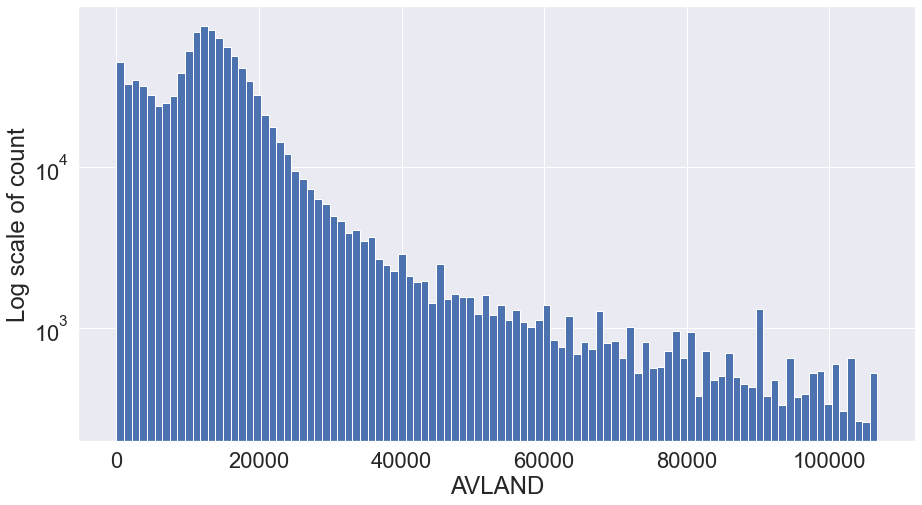

In [189]:
print((nydata.AVLAND>106740).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot13=nydata[nydata.AVLAND<=106740].AVLAND.plot(kind='hist',bins=100)
plot13.set(xlabel="AVLAND",ylabel="Log scale of count")
plt.xticks(rotation=0)
plot13.set_yscale('log')
plt.show()
plot13.figure.savefig('13AVLAND_summary.png',dpi=300)

In [198]:
nydata.AVTOT.value_counts(normalize=True,bins=150000)[:20]
# nydata.AVTOT.describe()

(-4668308.948, 31122.06]    0.629209
(31122.06, 62244.119]       0.173074
(62244.119, 93366.179]      0.051496
(93366.179, 124488.239]     0.026812
(124488.239, 155610.298]    0.017871
(155610.298, 186732.358]    0.012917
(186732.358, 217854.418]    0.009382
(217854.418, 248976.477]    0.007118
(248976.477, 280098.537]    0.005946
(280098.537, 311220.596]    0.004865
(311220.596, 342342.656]    0.004253
(342342.656, 373464.716]    0.003784
(373464.716, 404586.775]    0.003233
(404586.775, 435708.835]    0.002906
(435708.835, 466830.895]    0.002421
(466830.895, 497952.954]    0.002172
(497952.954, 529075.014]    0.002050
(529075.014, 560197.074]    0.001864
(560197.074, 591319.133]    0.001573
(591319.133, 622441.193]    0.001536
Name: AVTOT, dtype: float64

0.08862047779912866


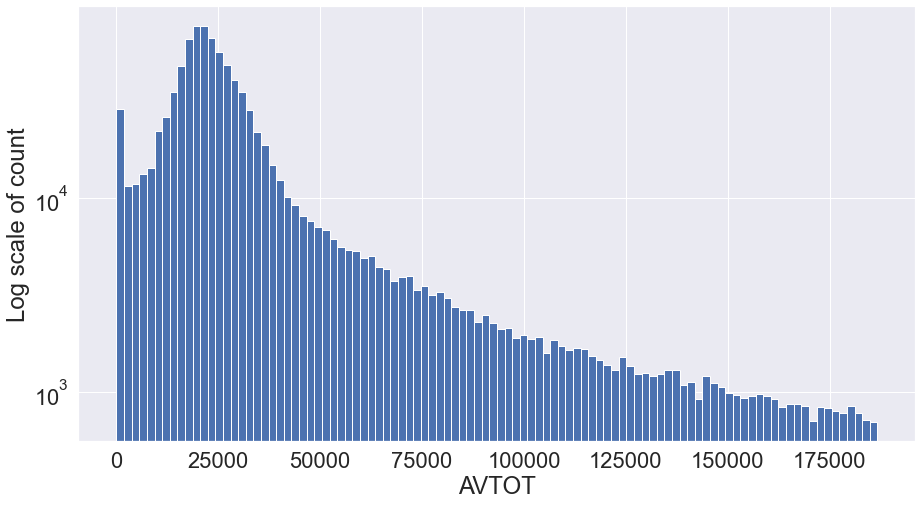

In [205]:
print((nydata.AVTOT>186732).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot16=nydata[nydata.AVTOT<=186732].AVTOT.plot(kind='hist',bins=100)
plot16.set(xlabel="AVTOT",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot16.set_yscale('log')
plt.show()
plot16.figure.savefig('16AVTOT_summary.png',dpi=300)

In [206]:
nydata.EXLAND.value_counts(normalize=True,bins=150000)[:20]
# nydata.AVTOT.describe()

(-2668500.001, 17790.0]    0.962801
(17790.0, 35580.0]         0.015133
(35580.0, 53370.0]         0.003066
(53370.0, 71160.0]         0.002095
(71160.0, 88950.0]         0.001588
(88950.0, 106740.0]        0.001377
(106740.0, 124530.0]       0.001031
(124530.0, 142320.0]       0.000905
(142320.0, 160110.0]       0.000695
(160110.0, 177900.0]       0.000608
(177900.0, 195690.0]       0.000569
(195690.0, 213480.0]       0.000534
(213480.0, 231270.0]       0.000405
(231270.0, 249060.0]       0.000374
(266850.0, 284640.0]       0.000331
(249060.0, 266850.0]       0.000305
(302430.0, 320220.0]       0.000253
(338010.0, 355800.0]       0.000242
(320220.0, 338010.0]       0.000223
(284640.0, 302430.0]       0.000216
Name: EXLAND, dtype: float64

0.010388480234249679


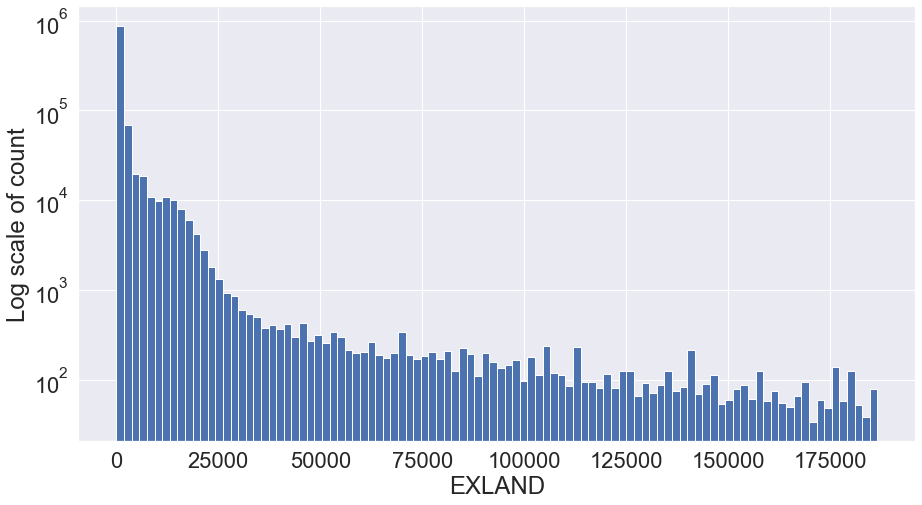

In [208]:
print((nydata.EXLAND>186732).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot17=nydata[nydata.EXLAND<=186732].EXLAND.plot(kind='hist',bins=100)
plot17.set(xlabel="EXLAND",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot17.set_yscale('log')
plt.show()
plot17.figure.savefig('17EXLAND_summary.png',dpi=300)

In [209]:
nydata.EXTOT.value_counts(normalize=True,bins=150000)[:20]
# nydata.AVTOT.describe()

(-4668308.948, 31122.06]    0.924301
(31122.06, 62244.119]       0.026173
(62244.119, 93366.179]      0.012359
(93366.179, 124488.239]     0.006633
(124488.239, 155610.298]    0.004317
(155610.298, 186732.358]    0.002883
(186732.358, 217854.418]    0.002441
(217854.418, 248976.477]    0.001713
(248976.477, 280098.537]    0.001348
(280098.537, 311220.596]    0.001116
(311220.596, 342342.656]    0.000950
(342342.656, 373464.716]    0.000824
(404586.775, 435708.835]    0.000631
(373464.716, 404586.775]    0.000616
(435708.835, 466830.895]    0.000517
(466830.895, 497952.954]    0.000484
(529075.014, 560197.074]    0.000451
(497952.954, 529075.014]    0.000438
(591319.133, 622441.193]    0.000337
(622441.193, 653563.253]    0.000325
Name: EXTOT, dtype: float64

0.0371673417404766


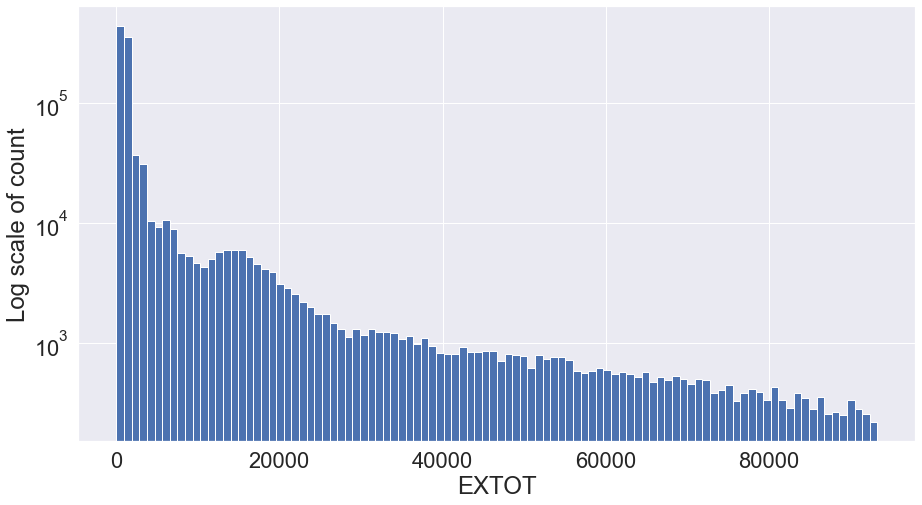

In [215]:
print((nydata.EXTOT>93366).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot18=nydata[nydata.EXTOT<=93366].EXTOT.plot(kind='hist',bins=100)
plot18.set(xlabel="EXTOT",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot18.set_yscale('log')
plt.show()
plot18.figure.savefig('18EXTOT_summary.png',dpi=300)

In [236]:
nydata.EXCD1.value_counts(normalize=True)
# nydata.EXCD1.describe()

1017.0    0.666180
1010.0    0.077928
1015.0    0.049058
5113.0    0.037366
1920.0    0.027556
            ...   
1992.0    0.000002
1562.0    0.000002
4650.0    0.000002
1606.0    0.000002
1841.0    0.000002
Name: EXCD1, Length: 129, dtype: float64

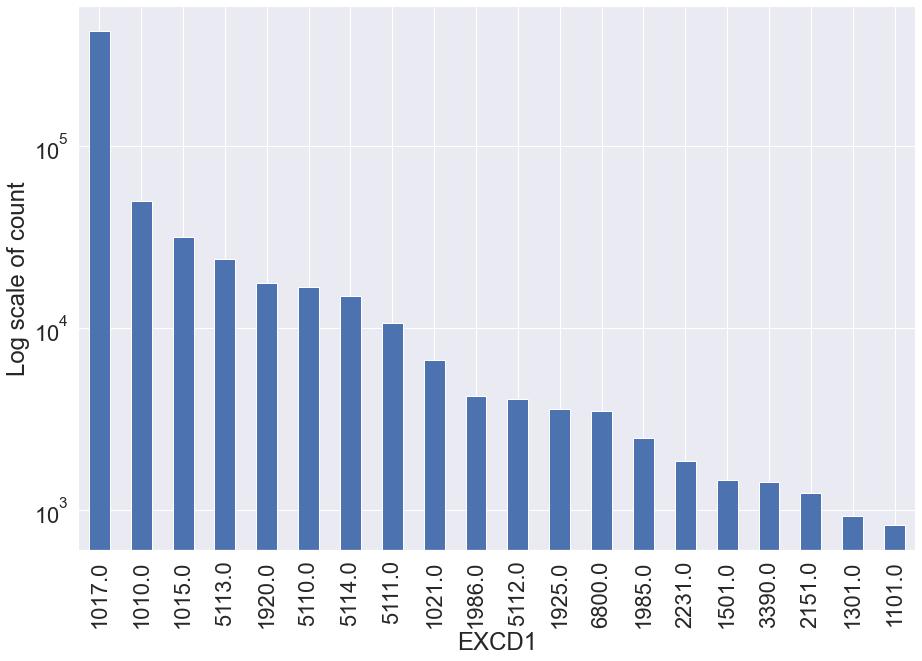

In [241]:
plt.rcParams["figure.figsize"] = [15,10]
plot19=nydata.EXCD1.value_counts().head(20).plot(kind="bar")
plot19.set(xlabel="EXCD1",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot19.set_yscale('log')
plt.show()
plot19.figure.savefig('19EXCD1_summary.png')

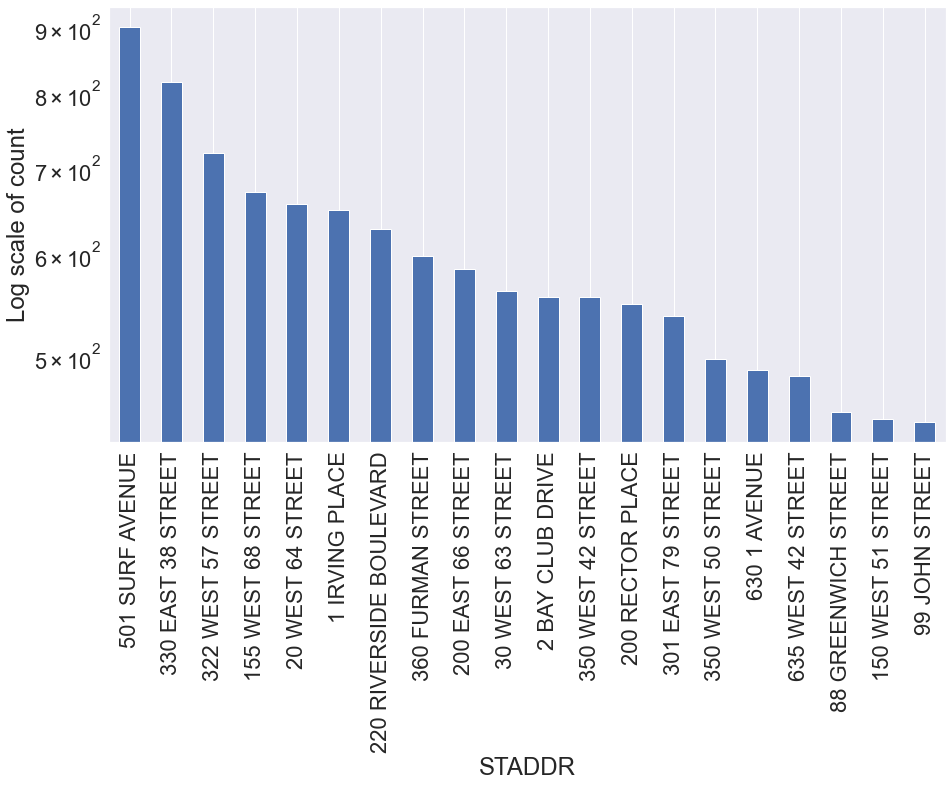

In [244]:
plt.rcParams["figure.figsize"] = [15,8]
plot20=nydata.STADDR.value_counts().head(20).plot(kind="bar")
plot20.set(xlabel="STADDR",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot20.set_yscale('log')
plt.show()
# plot19.figure.savefig('19EXCD1_summary.png')

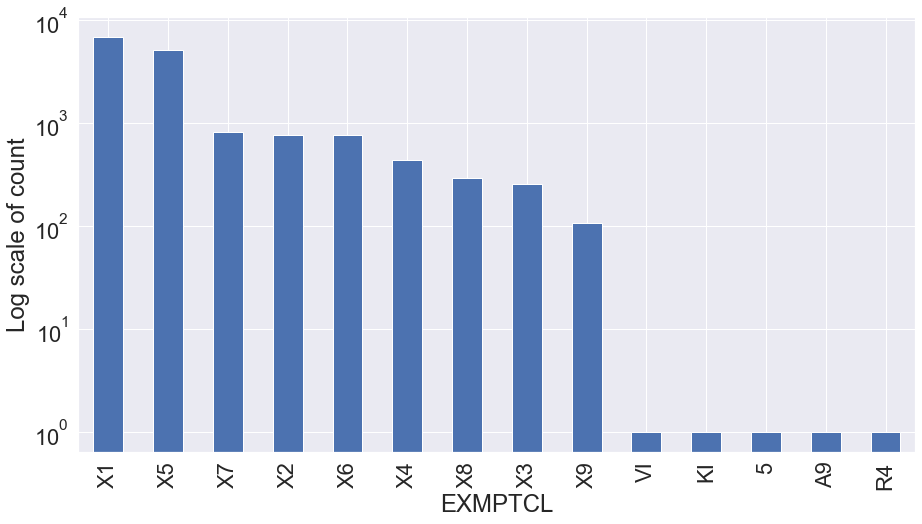

In [248]:
plt.rcParams["figure.figsize"] = [15,8]
plot21=nydata.EXMPTCL.value_counts().head(20).plot(kind="bar")
plot21.set(xlabel="EXMPTCL",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot21.set_yscale('log')
plt.show()
plot21.figure.savefig('21EXMPTCL_summary.png')

In [269]:
nydata.BLDFRONT.value_counts(normalize=True,bins=1500).sort_index()
# nydata.BLDFRONT.describe()

(-7.5760000000000005, 5.05]    2.138070e-01
(5.05, 10.1]                   1.733903e-03
(10.1, 15.15]                  3.826632e-02
(15.15, 20.2]                  3.781935e-01
(20.2, 25.25]                  1.872774e-01
                                   ...     
(7549.75, 7554.8]              0.000000e+00
(7554.8, 7559.85]              0.000000e+00
(7559.85, 7564.9]              0.000000e+00
(7564.9, 7569.95]              0.000000e+00
(7569.95, 7575.0]              9.337120e-07
Name: BLDFRONT, Length: 1500, dtype: float64

0.013063565248731552


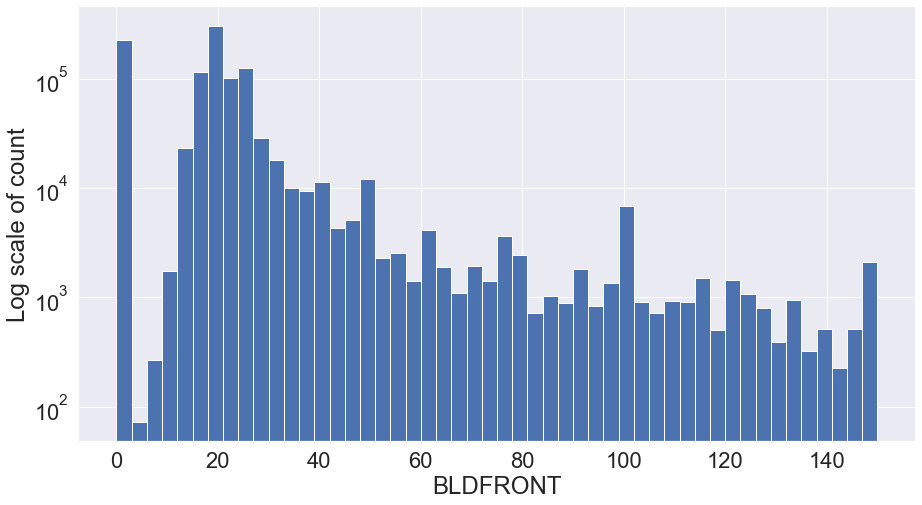

In [285]:
print((nydata.BLDFRONT>150).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot23=nydata[nydata.BLDFRONT<=150].BLDFRONT.plot(kind='hist',bins=50)
plot23.set(xlabel="BLDFRONT",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot23.set_yscale('log')
plt.show()
plot23.figure.savefig('23BLDFRONT_summary.png',dpi=300)

In [289]:
nydata.BLDDEPTH.value_counts(normalize=True,bins=1500).sort_index()[:20]
# nydata.BLDDEPTH.describe()

(-9.394, 6.262]       0.213982
(6.262, 12.524]       0.000772
(12.524, 18.786]      0.002755
(18.786, 25.048]      0.030369
(25.048, 31.31]       0.081302
(31.31, 37.572]       0.140214
(37.572, 43.834]      0.123045
(43.834, 50.096]      0.160107
(50.096, 56.358]      0.078086
(56.358, 62.62]       0.039604
(62.62, 68.882]       0.025490
(68.882, 75.144]      0.019582
(75.144, 81.406]      0.015445
(81.406, 87.668]      0.012518
(87.668, 93.93]       0.011397
(93.93, 100.192]      0.019361
(100.192, 106.454]    0.003161
(106.454, 112.716]    0.001726
(112.716, 118.978]    0.001762
(118.978, 125.24]     0.002261
Name: BLDDEPTH, dtype: float64

0.02258556070342131


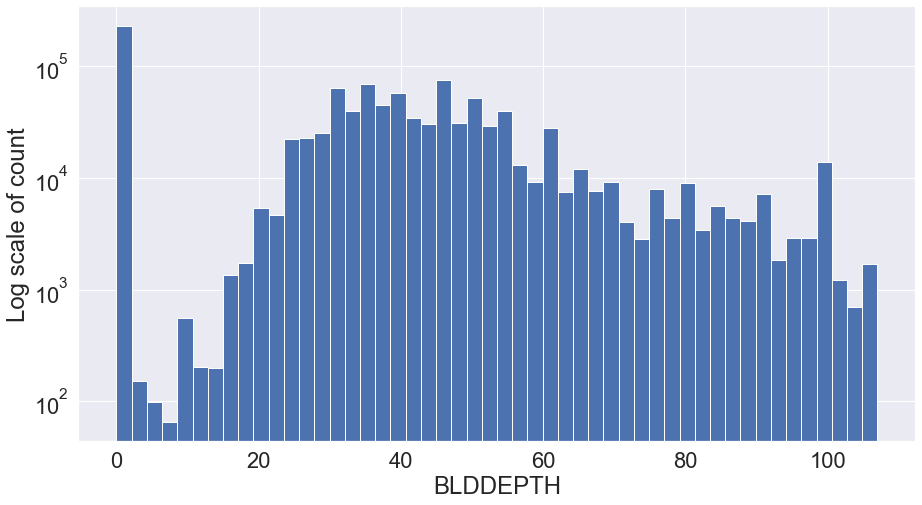

In [301]:
print((nydata.BLDDEPTH>107).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot24=nydata[nydata.BLDDEPTH<=107].BLDDEPTH.plot(kind='hist',bins=50)
plot24.set(xlabel="BLDDEPTH",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot24.set_yscale('log')
plt.show()
plot24.figure.savefig('24BLDDEPTH_summary.png',dpi=300)

In [304]:
nydata.AVLAND2.value_counts(normalize=True,bins=150000)[:20]
# nydata.AVLAND2.describe()

(-2371001.998, 15809.7]    0.115191
(15809.7, 31616.4]         0.047160
(31616.4, 47423.1]         0.022889
(47423.1, 63229.8]         0.013225
(63229.8, 79036.5]         0.008330
(79036.5, 94843.2]         0.006221
(94843.2, 110649.9]        0.004569
(110649.9, 126456.6]       0.003947
(126456.6, 142263.3]       0.003302
(142263.3, 158070.0]       0.002869
(173876.7, 189683.4]       0.002290
(158070.0, 173876.7]       0.002079
(189683.4, 205490.1]       0.001944
(221296.8, 237103.5]       0.001707
(205490.1, 221296.8]       0.001493
(237103.5, 252910.2]       0.001247
(268716.9, 284523.6]       0.001204
(300330.3, 316137.0]       0.001016
(252910.2, 268716.9]       0.000976
(284523.6, 300330.3]       0.000881
Name: AVLAND2, dtype: float64

0.0655195080457967


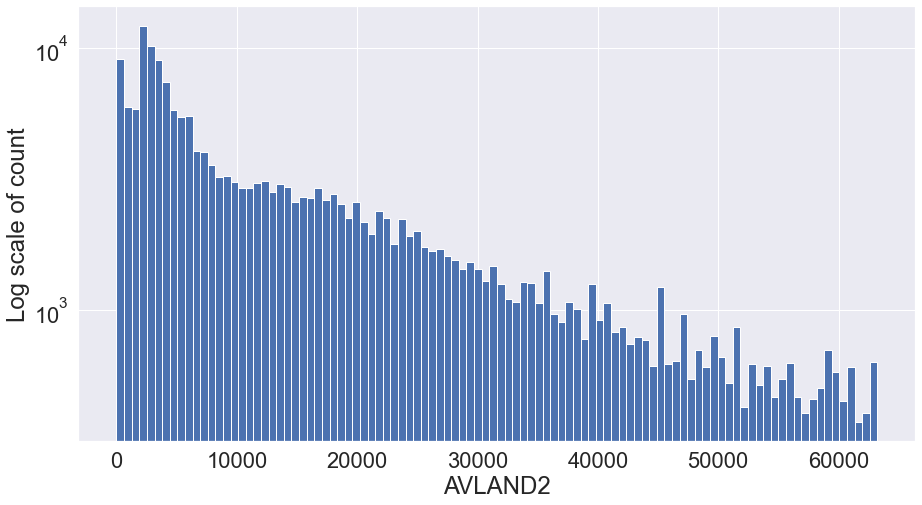

In [311]:
print((nydata.AVLAND2>63229).mean())
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot25=nydata[nydata.AVLAND2<=63229].AVLAND2.plot(kind='hist',bins=100)
plot25.set(xlabel="AVLAND2",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot25.set_yscale('log')
plt.show()
plot25.figure.savefig('25AVLAND2_summary.png',dpi=300)

In [315]:
nydata.AVTOT2.value_counts(normalize=True,bins=150000)[:30]
# nydata.AVTOT2.describe()

(-4501177.0, 30010.867]     0.059553
(30010.867, 60018.733]      0.047740
(60018.733, 90026.6]        0.033876
(90026.6, 120034.467]       0.019785
(120034.467, 150042.333]    0.013642
(150042.333, 180050.2]      0.009998
(180050.2, 210058.067]      0.007384
(210058.067, 240065.933]    0.005936
(240065.933, 270073.8]      0.004683
(270073.8, 300081.667]      0.004171
(300081.667, 330089.533]    0.003663
(330089.533, 360097.4]      0.003153
(360097.4, 390105.267]      0.002697
(390105.267, 420113.133]    0.002526
(420113.133, 450121.0]      0.002233
(450121.0, 480128.867]      0.002015
(480128.867, 510136.733]    0.001937
(510136.733, 540144.6]      0.001741
(540144.6, 570152.467]      0.001563
(570152.467, 600160.333]    0.001430
(600160.333, 630168.2]      0.001352
(630168.2, 660176.067]      0.001261
(660176.067, 690183.933]    0.001239
(690183.933, 720191.8]      0.001135
(720191.8, 750199.666]      0.000968
(750199.666, 780207.533]    0.000955
(780207.533, 810215.4]      0.000880
(

0.0293


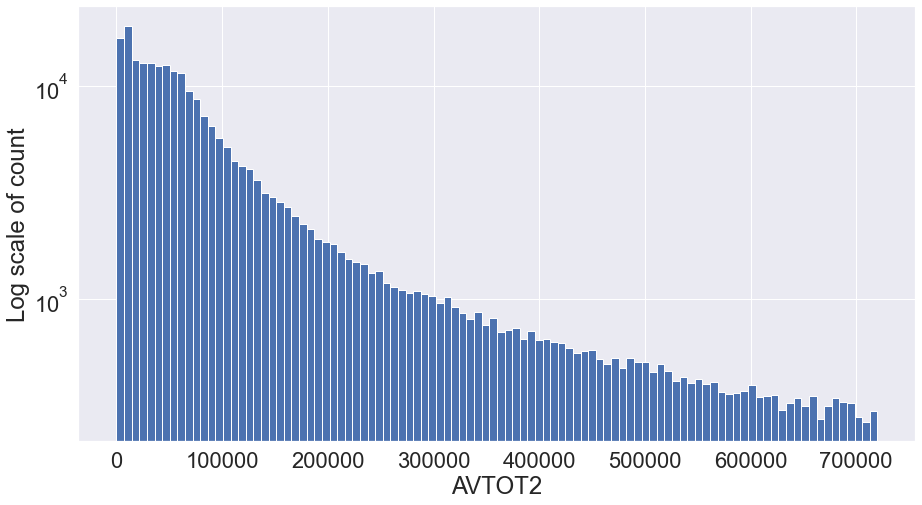

In [319]:
print((nydata.AVTOT2>720191).mean().round(4))
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot26=nydata[nydata.AVTOT2<=720191].AVTOT2.plot(kind='hist',bins=100)
plot26.set(xlabel="AVTOT2",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot26.set_yscale('log')
plt.show()
plot26.figure.savefig('26AVTOT2_summary.png',dpi=300)

In [320]:
nydata.EXLAND2.value_counts(normalize=True,bins=150000)[:30]
# nydata.EXLAND2.describe()

(-2371004.0, 15807.7]    0.055154
(15807.7, 31614.4]       0.006064
(31614.4, 47421.1]       0.002694
(47421.1, 63227.8]       0.001903
(63227.8, 79034.5]       0.001362
(79034.5, 94841.2]       0.001145
(94841.2, 110647.9]      0.000901
(110647.9, 126454.6]     0.000814
(126454.6, 142261.3]     0.000628
(142261.3, 158068.0]     0.000570
(173874.7, 189681.4]     0.000508
(158068.0, 173874.7]     0.000431
(189681.4, 205488.1]     0.000396
(205488.1, 221294.8]     0.000361
(221294.8, 237101.5]     0.000341
(237101.5, 252908.2]     0.000326
(268714.9, 284521.6]     0.000273
(300328.3, 316135.0]     0.000253
(363555.1, 379361.8]     0.000204
(252908.2, 268714.9]     0.000193
(331941.7, 347748.4]     0.000187
(284521.6, 300328.3]     0.000171
(426781.9, 442588.6]     0.000168
(395168.5, 410975.2]     0.000167
(616462.3, 632269.0]     0.000152
(347748.4, 363555.1]     0.000147
(458395.3, 474202.0]     0.000147
(490008.7, 505815.4]     0.000146
(316135.0, 331941.7]     0.000138
(553235.5, 569

0.0133


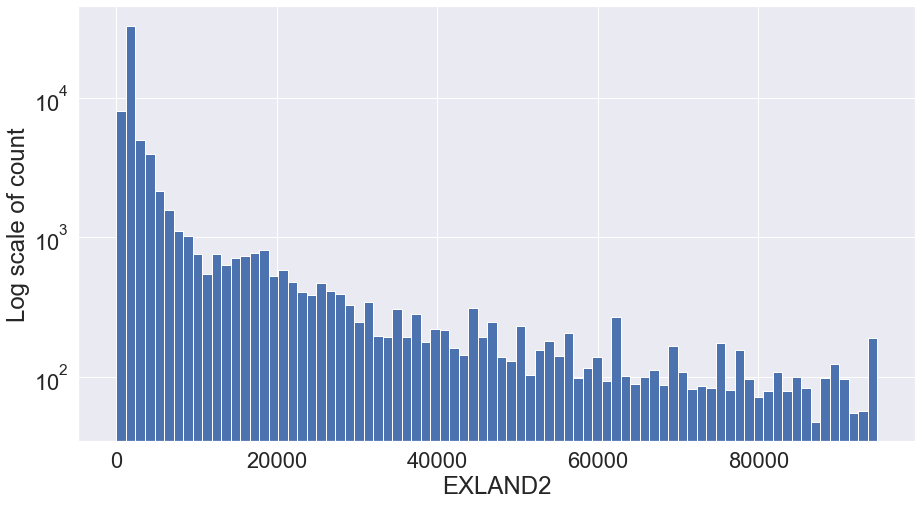

In [329]:
print((nydata.EXLAND2>94841).mean().round(4))
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot27=nydata[nydata.EXLAND2<=94841].EXLAND2.plot(kind='hist',bins=80)
plot27.set(xlabel="EXLAND2",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot27.set_yscale('log')
plt.show()
plot27.figure.savefig('27EXLAND2_summary.png',dpi=300)

In [334]:
nydata.EXTOT2.value_counts(normalize=True,bins=200000)[:30]
# nydata.EXTOT2.describe()

(-4501172.996, 22512.9]     0.050988
(22512.9, 45018.8]          0.015808
(45018.8, 67524.7]          0.013415
(67524.7, 90030.6]          0.007598
(90030.6, 112536.5]         0.004801
(112536.5, 135042.4]        0.003448
(135042.4, 157548.3]        0.002453
(157548.3, 180054.2]        0.001775
(180054.2, 202560.1]        0.001447
(202560.1, 225066.0]        0.001249
(225066.0, 247571.9]        0.001015
(247571.9, 270077.8]        0.000864
(270077.8, 292583.7]        0.000773
(292583.7, 315089.6]        0.000723
(315089.6, 337595.5]        0.000589
(337595.5, 360101.4]        0.000536
(360101.4, 382607.3]        0.000484
(405113.2, 427619.1]        0.000422
(382607.3, 405113.2]        0.000401
(427619.1, 450125.0]        0.000392
(472630.899, 495136.799]    0.000344
(450125.0, 472630.899]      0.000343
(517642.699, 540148.599]    0.000315
(495136.799, 517642.699]    0.000298
(540148.599, 562654.499]    0.000259
(675183.999, 697689.899]    0.000244
(562654.499, 585160.399]    0.000243
(

0.0182


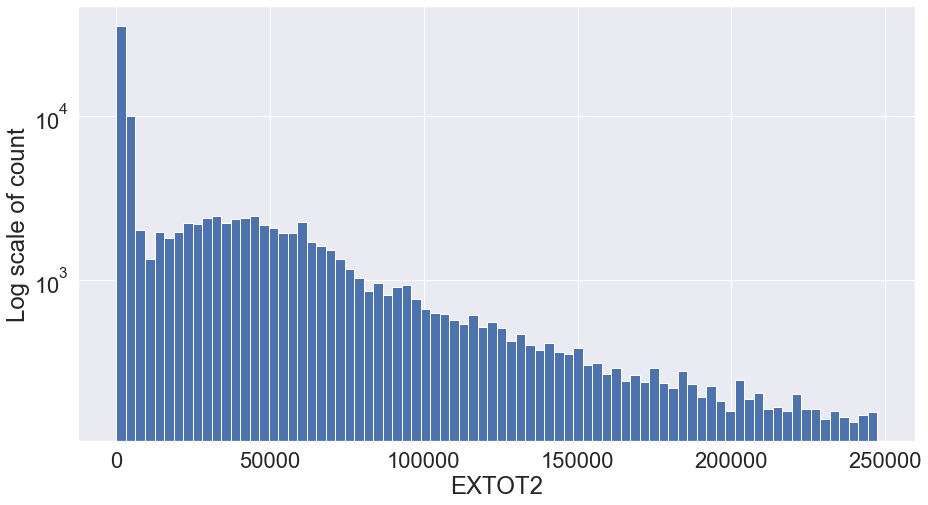

In [341]:
print((nydata.EXTOT2>247571).mean().round(4))
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plot28=nydata[nydata.EXTOT2<=247571].EXTOT2.plot(kind='hist',bins=80)
plot28.set(xlabel="EXTOT2",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot28.set_yscale('log')
plt.show()
plot28.figure.savefig('28EXTOT2_summary.png',dpi=300)

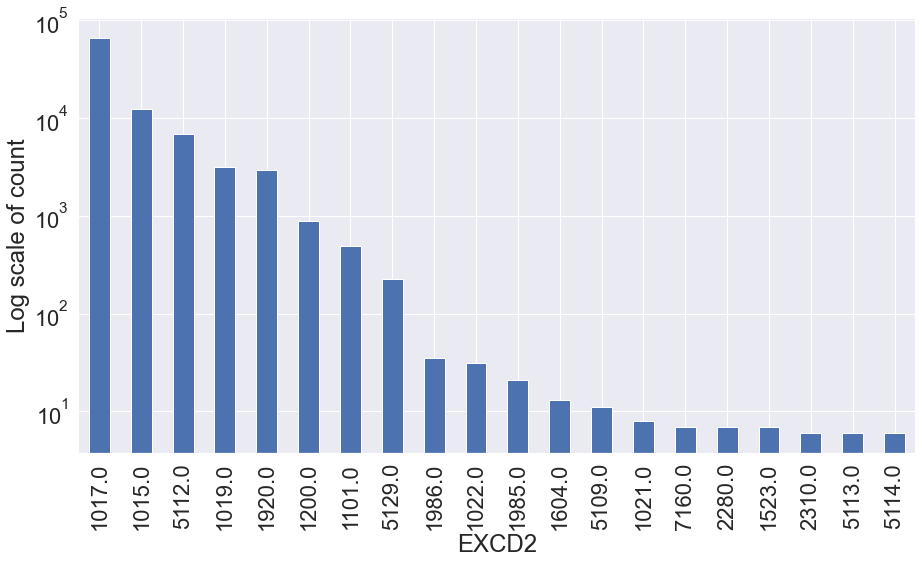

In [344]:
plt.rcParams["figure.figsize"] = [15,8]
plot29=nydata.EXCD2.value_counts().head(20).plot(kind="bar")
plot29.set(xlabel="EXCD2",ylabel="Log scale of count")
# plt.xticks(rotation=0)
plot29.set_yscale('log')
plt.show()
plot29.figure.savefig('29EXCD2_summary.png')

In [156]:
nydata.PERIOD.value_counts()

FINAL    1070994
Name: PERIOD, dtype: int64

In [157]:
nydata.YEAR.value_counts()

2010/11    1070994
Name: YEAR, dtype: int64

In [158]:
nydata.VALTYPE.value_counts()

AC-TR    1070994
Name: VALTYPE, dtype: int64

10314.0    24606
11234.0    20001
10312.0    18127
10462.0    16905
10306.0    16578
           ...  
11005.0        1
11241.0        1
11371.0        1
11359.0        1
10162.0        1
Name: ZIP, Length: 196, dtype: int64